<a href="https://colab.research.google.com/github/masoud-moghini/TinyML/blob/main/TinyMLCh03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from tensorflow.keras.models import Sequential

In [2]:
from tensorflow.keras.layers import Dense

In [3]:
model = Sequential()

In [4]:
from tensorflow.keras.datasets import mnist
(X_train,Y_train),(X_test,Y_test) = mnist.load_data()

In [5]:
print('shape of training data' ,X_train.shape)
print('shape of training labels',Y_train.shape)
print('shape of training data ',X_test.shape)
print('shape of training labels ',Y_test.shape)
print('type of X_train ',type(X_train))
print('type of y_train ',type(Y_train))

shape of training data (60000, 28, 28)
shape of training labels (60000,)
shape of training data  (10000, 28, 28)
shape of training labels  (10000,)
type of X_train  <class 'numpy.ndarray'>
type of y_train  <class 'numpy.ndarray'>


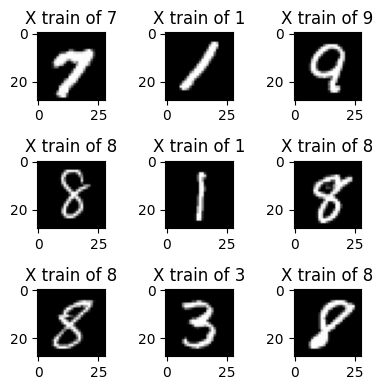

In [6]:
import matplotlib.pyplot as plt
import random
import numpy as np
plt.rcParams['figure.figsize'] = (4,4)
for i in range(9):
  plt.subplot(3,3,i+1)
  num = random.randint(1,len(X_train))
  plt.imshow(X_train[num],cmap='gray')
  plt.title('X train of {}'.format(Y_train[num]))

plt.tight_layout()

In [7]:
# Reshape Input to be Feed into the model

X_train = X_train.reshape(60000,784)
X_test = X_test.reshape(10000,784)

# Normalize data in order to be feed into the model Pre-processing


X_train.astype('float32')
X_test.astype('float32')

X_train = X_train / 255
X_test = X_test / 255

# Categorize output using one-hot encoding


In [8]:
from tensorflow.keras.utils import to_categorical
num_class = 10
print('label of 100th instance in training data: ', Y_train[100])
print('label of 500th instance in test data: ', Y_test[500])
Y_train = to_categorical(Y_train, num_class)
Y_test = to_categorical(Y_test, num_class)
print('label of 100th instance in training data one hot encoded: ',Y_test[500])

label of 100th instance in training data:  5
label of 500th instance in test data:  3
label of 100th instance in training data one hot encoded:  [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]


In [9]:
model = Sequential()
model.add(Dense(512, activation = 'relu', input_shape = (784,)))
model.add(Dense(128, activation = 'relu'))
model.add(Dense(num_class, activation = 'softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               401920    
                                                                 
 dense_1 (Dense)             (None, 128)               65664     
                                                                 
 dense_2 (Dense)             (None, 10)                1290      
                                                                 
Total params: 468874 (1.79 MB)
Trainable params: 468874 (1.79 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [10]:
model.compile(loss="categorical_crossentropy",optimizer="adam",metrics=['accuracy'])

In [11]:
Y_train.shape

(60000, 10)

In [12]:
X_train.shape

(60000, 784)

In [14]:
model.fit(X_train,Y_train,batch_size=128,epochs=10,verbose=1)

Epoch 1/10
469/469 [==============================] - 8s 13ms/step - loss: 0.2378 - accuracy: 0.9300
Epoch 2/10
469/469 [==============================] - 7s 14ms/step - loss: 0.0872 - accuracy: 0.9736
Epoch 3/10
469/469 [==============================] - 5s 12ms/step - loss: 0.0564 - accuracy: 0.9822
Epoch 4/10
469/469 [==============================] - 7s 14ms/step - loss: 0.0382 - accuracy: 0.9878
Epoch 5/10
469/469 [==============================] - 5s 11ms/step - loss: 0.0291 - accuracy: 0.9908
Epoch 6/10
469/469 [==============================] - 5s 11ms/step - loss: 0.0208 - accuracy: 0.9933
Epoch 7/10
469/469 [==============================] - 7s 14ms/step - loss: 0.0183 - accuracy: 0.9940
Epoch 8/10
469/469 [==============================] - 5s 11ms/step - loss: 0.0148 - accuracy: 0.9950
Epoch 9/10
469/469 [==============================] - 7s 14ms/step - loss: 0.0145 - accuracy: 0.9952
Epoch 10/10
469/469 [==============================] - 5s 11ms/step - loss: 0.0125 - accura